**MACHINE LEARNING PROJECT**

PART 1

Explore the dataset and check if the data can be used as it is. or either we need preprocessing the data


1)load the dataset

In [27]:
from google.colab import files
upload=files.upload()

Saving HR_comma_sep1.csv to HR_comma_sep1.csv


2)read the dataset

In [31]:
import pandas as pd
df=pd.read_csv('HR_comma_sep1.csv')

3)processing the dataset

In [32]:
df.shape

(14999, 10)

In [33]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,left,0,sales,low
1,0.80,0.86,5,262,6,0,left,0,sales,medium
2,0.11,0.88,7,272,4,0,left,0,sales,medium
3,0.72,0.87,5,223,5,0,left,0,sales,low
4,0.37,0.52,2,159,3,0,left,0,sales,low


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df[df.duplicated()]

In [37]:
df=df.drop_duplicates()

**PART 2:**Determine the relationship between satisfaction level and working hours of employees who have left the organization.=for relationship between variable we have to find correlation

In [ ]:
df.corr()

here we can observe that satisfication level and working hours have negative correlation which means if working hour increases satisfication level decreases

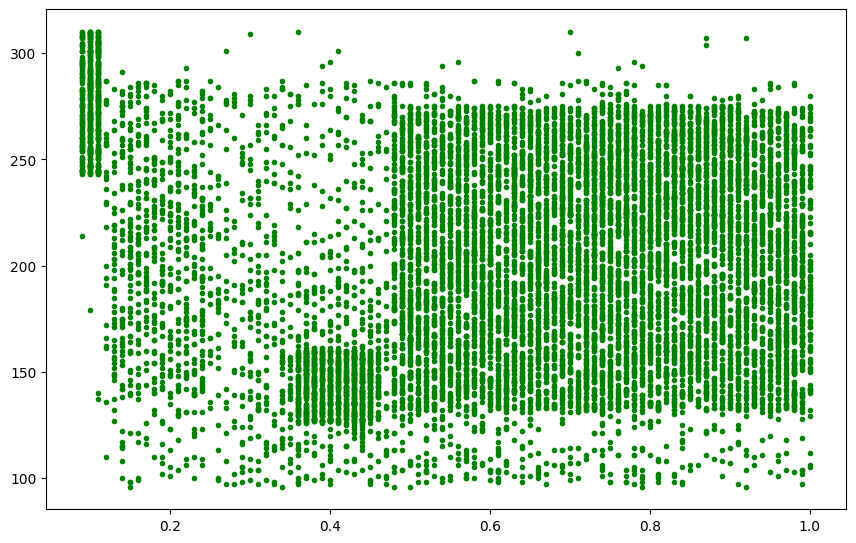

In [39]:
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure(figsize=(8,5))
ax=fig.add_axes([0,0,1,1])
x=df['satisfaction_level']
y=df['average_montly_hours']
ax.scatter(x,y,color='g',marker='.')

**PART 3:Understand the effect of satisfaction level, department, promotion in last 5 years and salary level of employees who have left the organization.**

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fig=plt.subplots(figsize=(10,15))
ftr=['satisfaction_level','Department','promotion_last_5years'	,'salary']
for p,q in enumerate(ftr):
    plt.subplot(3,2,p+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=q,data=df, hue='left')
    plt.xticks(rotation=90)




Promotion:Likely quit---> Havent  recieved promotion

**PART 4: Build a machine learning model to predict the exit of employees**

decision tree is used to build the model

1)determine input and output variable

In [42]:
# Selecting the predictor attributes
X = df.columns.drop("left")
# Selecting  the target
y = df['left']


2)encoding categorical values to convert it into numerical values

In [ ]:
# Encoding all the predictor variables to convert the categorical values to numerical values
import pandas as pd
employee_data_encoded = pd.get_dummies(df[X])
print("Total number of predictors after encoding = ", len(employee_data_encoded.columns))
# Printing the list of columns after encoding to understand the encoding process
print(employee_data_encoded.columns)
print(employee_data_encoded['salary_low'])


3)splitting of train data and test data  

In [44]:
# Import the required function
from sklearn.model_selection import train_test_split
#splitting data into train and test datasets
X_train,X_test,y_train,y_test = train_test_split(employee_data_encoded, y,test_size=0.15,random_state=100)
# Printing the shape of the resulting datasets
print("Shape of X_train and y_train are:", X_train.shape, "and", y_train.shape, " respectively")
print("Shape of X_test and y_test are:", X_test.shape, "and", y_test.shape, " respectively")


Shape of X_train and y_train are: (10192, 20) and (10192,)  respectively
Shape of X_test and y_test are: (1799, 20) and (1799,)  respectively


4)choosing the decsion algorithm

In [45]:
# Importing required class
from sklearn.tree import DecisionTreeClassifier
# Creating an object of the DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state = 1)
# Training model on the training data
model.fit(X_train,y_train)


DecisionTreeClassifier(random_state=1)

In [46]:
# Predicting target values using the model built on training data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


5) for displaying the decision tree

In [ ]:
# Importing the required libraries (Ensure that they are already installed.)
from sklearn.tree import export_graphviz
import graphviz
# Generating the tree
dot_data = export_graphviz(model, out_file=None,
                          feature_names=employee_data_encoded.columns,
                          class_names=model.classes_,
                          )
graph = graphviz.Source(dot_data)
graph


6)evaluating the performance of model

In [48]:
# Getting the accuracy on train data
train_accuracy = model.score(X_train,y_train)
print("Accuracy of the model on train data = ",train_accuracy)
# Getting the accuracy on test data
test_accuracy = model.score(X_test,y_test)
print("Accuracy of the model on test data = ",test_accuracy)


Accuracy of the model on train data =  1.0
Accuracy of the model on test data =  0.9677598665925514


7)testing the model

In [ ]:

value=X_test.tail(5)
print(value)
prediction=model.predict(value)
print(prediction)